In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)
import numpy as np

In [2]:
data=pd.read_csv('dataset.csv',index_col=0)

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,200000,2,3,1,30,2,2,2,2,2,...,147273,149244,151973,6600,6000,5860,6000,5000,0,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,...,8168,6894,11424,3353,3,5101,6,6530,8103,1
3,50000,1,2,2,23,0,0,0,-1,0,...,48437,18712,19129,4175,41000,51705,700,718,700,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,780,0,0,0,0,0,0


In [4]:
data.shape

(22500, 24)

In [5]:
data.info() #all ints

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22499
Data columns (total 24 columns):
LIMIT_BAL                     22500 non-null int64
SEX                           22500 non-null int64
EDUCATION                     22500 non-null int64
MARRIAGE                      22500 non-null int64
AGE                           22500 non-null int64
PAY_0                         22500 non-null int64
PAY_2                         22500 non-null int64
PAY_3                         22500 non-null int64
PAY_4                         22500 non-null int64
PAY_5                         22500 non-null int64
PAY_6                         22500 non-null int64
BILL_AMT1                     22500 non-null int64
BILL_AMT2                     22500 non-null int64
BILL_AMT3                     22500 non-null int64
BILL_AMT4                     22500 non-null int64
BILL_AMT5                     22500 non-null int64
BILL_AMT6                     22500 non-null int64
PAY_AMT1                

In [6]:
data.rename(columns={'default payment next month': 'default'},inplace=True)

In [7]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [8]:
data.isnull().sum() #no missing data

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

Target Variable
default
0    17523
1     4977
Name: default, dtype: int64


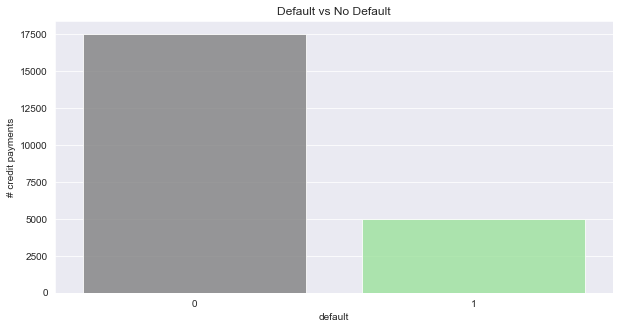

In [15]:
#unbalanced, will need to adjust this...

# target count
print('Target Variable')
print(data.groupby(['default'])['default'].count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(data['default'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Default vs No Default')
plt.ylabel('# of credit payments')
plt.show()

In [18]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,200000,2,3,1,30,2,2,2,2,2,...,147273,149244,151973,6600,6000,5860,6000,5000,0,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,...,8168,6894,11424,3353,3,5101,6,6530,8103,1
3,50000,1,2,2,23,0,0,0,-1,0,...,48437,18712,19129,4175,41000,51705,700,718,700,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,780,0,0,0,0,0,0


In [23]:
data.LIMIT_BAL.describe()

count      22500.000000
mean      167267.274667
std       129383.700485
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [24]:
data.SEX.value_counts()

2    13557
1     8943
Name: SEX, dtype: int64

In [25]:
data.EDUCATION.value_counts() #what to do with 4,5,6,0 #taiwan stats #just others

2    10546
1     7921
3     3690
5      205
4       90
6       35
0       13
Name: EDUCATION, dtype: int64

In [27]:
data.MARRIAGE.value_counts() #what to do with 3,0 #divorced? #taiwan stats

2    11942
1    10281
3      236
0       41
Name: MARRIAGE, dtype: int64

In [28]:
data.AGE.describe()

count    22500.000000
mean        35.526000
std          9.231461
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [34]:
data.PAY_4.value_counts() #what does 0 mean? and -2? #-2 means no balance
#-2 means no balance, inactive
#0 means a customer that paid the minimum due in the prior month so in good standing
#-1 paid duly, pay off balance month to month
#maybe update these all to be 0 or 1 
#0 is good standing 
# 1 is some delay

 0    12383
-1     4252
-2     3253
 2     2352
 3      135
 4       48
 7       45
 5       27
 6        3
 8        1
 1        1
Name: PAY_4, dtype: int64

In [40]:
data.describe() #compare bill_amt and pay_amt

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167267.274667,1.602533,1.852356,1.549911,35.526000,-0.014978,-0.135200,-0.166800,-0.221333,-0.266533,-0.289289,51103.106044,49042.258756,46857.392267,43265.662667,40400.279733,38997.275778,5697.756489,5.944526e+03,5308.332489,4802.920444,4724.458178,5165.231067,0.221200
std,129383.700485,0.489385,0.787066,0.521673,9.231461,1.119429,1.189176,1.194886,1.166326,1.131526,1.148087,73311.970328,70751.920559,68466.320637,64360.019334,60879.044012,59646.978910,17201.619690,2.214392e+04,18549.384158,15738.417203,14938.300190,17467.663795,0.415064
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-61372.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3481.750000,2948.250000,2610.500000,2280.000000,1760.000000,1243.750000,1000.000000,8.270000e+02,390.000000,300.000000,258.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22461.000000,21331.500000,20116.000000,19003.500000,18105.500000,17071.000000,2100.000000,2.006000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66996.750000,63805.750000,60184.250000,54562.500000,50343.750000,49355.500000,5009.000000,5.000000e+03,4510.500000,4001.500000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,855086.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


In [ ]:
#clean up by end of day monday 

#marriage,education,history of past payments pay_0 through pay_6 - all have unknowns

#map these values to something else? for pay, 0 or 1? 

#EDU 4,5,6,0 -> all to 4(other) for other?
#marriage 0,3 -> all 0s to 3 for others ... divorced?
#past payment columns -> -2,-1,0 all to 0 meaning good standing and 1-9 to 1 meaning delay

#do we need dummy variables? review this... for education, marriage and history of past payments
#maybe for education and marriage after above

#1) age binned to dummy cols? i think fine as is

#look up different models to see different data types 

#2) create 6 cols for difference between bill amount and pay amount


In [55]:
#data['EDUCATION']=np.where(data['EDUCATION'] =='basic.9y', 'Basic', data['education'])

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,200000,2,3,1,30,2,2,2,2,2,2,140327,143137,145374,147273,149244,151973,6600,6000,5860,6000,5000,0,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,0,2937,5696,4144,8168,6894,11424,3353,3,5101,6,6530,8103,1
3,50000,1,2,2,23,0,0,0,-1,0,0,51274,50474,49724,48437,18712,19129,4175,41000,51705,700,718,700,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,-2,390,780,0,0,0,0,780,0,0,0,0,0,0
5,400000,1,2,2,44,0,0,0,0,0,0,6902,7904,7566,7716,7722,7890,1216,1213,363,219,234,159,0
6,70000,2,2,2,22,0,-1,0,0,0,0,9232,68209,66087,50716,48862,49850,68209,2081,2000,2000,1828,1518,0
7,170000,1,2,1,38,0,0,0,0,0,-1,157174,139101,192575,157028,135838,125483,9900,83200,0,3006,132854,5003,0
8,20000,1,2,2,22,0,0,2,2,2,0,18743,19879,18872,21178,20329,20853,3000,0,3000,0,1000,400,0
9,60000,1,1,2,36,1,2,0,0,2,0,104492,53348,52817,57954,56556,55220,5200,3000,8500,0,4000,7000,0


In [109]:
data['due_vs_paid1']=data['BILL_AMT1']-data['PAY_AMT1']
data['due_vs_paid2']=data['BILL_AMT2']-data['PAY_AMT2']
data['due_vs_paid3']=data['BILL_AMT3']-data['PAY_AMT3']
data['due_vs_paid4']=data['BILL_AMT4']-data['PAY_AMT4']
data['due_vs_paid5']=data['BILL_AMT5']-data['PAY_AMT5']
data['due_vs_paid6']=data['BILL_AMT6']-data['PAY_AMT6']

In [110]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,due_vs_paid1,due_vs_paid2,due_vs_paid3,due_vs_paid4,due_vs_paid5,due_vs_paid6
0,200000,2,3,1,30,2,2,2,2,2,2,140327,143137,145374,147273,149244,151973,6600,6000,5860,6000,5000,0,0,133727,137137,139514,141273,144244,151973
1,200000,2,4,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,0,2937,5696,4144,8168,6894,11424,3353,3,5101,6,6530,8103,1,-416,5693,-957,8162,364,3321
3,50000,1,2,2,23,0,0,0,-1,0,0,51274,50474,49724,48437,18712,19129,4175,41000,51705,700,718,700,0,47099,9474,-1981,47737,17994,18429
4,20000,1,2,1,47,-1,-1,-1,-2,-2,-2,390,780,0,0,0,0,780,0,0,0,0,0,0,-390,780,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,50000,2,2,1,50,0,0,0,0,0,0,21956,20439,20691,17081,16234,16330,2000,1306,1206,1000,697,532,0,19956,19133,19485,16081,15537,15798
22496,80000,2,2,1,53,0,0,0,0,0,0,48688,101878,20475,20325,20276,20662,2530,3990,850,800,1100,1100,0,46158,97888,19625,19525,19176,19562
22497,50000,2,2,1,50,0,0,0,0,0,0,51212,50658,48999,49388,48853,47765,2070,2357,1746,1628,1520,2202,0,49142,48301,47253,47760,47333,45563
22498,220000,1,2,1,32,0,0,0,0,0,0,202010,103124,105226,107476,109746,111920,3746,3820,4000,4000,4000,4500,0,198264,99304,101226,103476,105746,107420


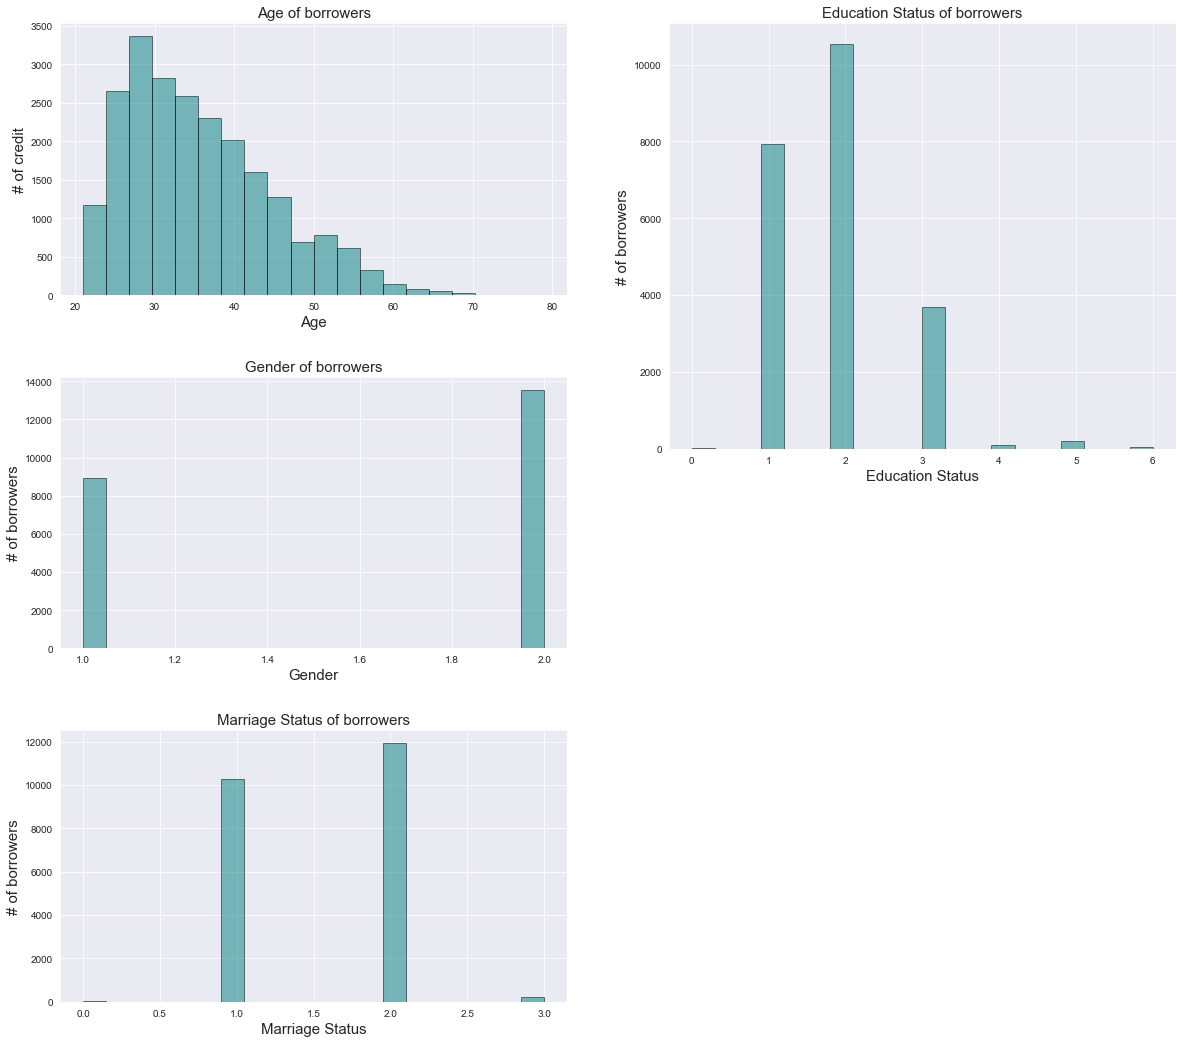

In [108]:
# Subplots of Numeric Features, distribution of features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,18))
fig.subplots_adjust(hspace = .30)


ax1 = fig.add_subplot(321)
ax1.hist(data['AGE'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Age', fontsize = 15)
ax1.set_ylabel('# of credit',fontsize = 15)
ax1.set_title('Age of borrowers',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(data['SEX'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Gender',fontsize = 15)
ax2.set_ylabel('# of borrowers',fontsize = 15)
ax2.set_title('Gender of borrowers',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(data['MARRIAGE'],bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Marriage Status',fontsize = 15)
ax3.set_ylabel('# of borrowers',fontsize = 15)
ax3.set_title('Marriage Status of borrowers',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(data['EDUCATION'],bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Education Status',fontsize = 15)
ax4.set_ylabel('# of borrowers',fontsize = 15)
ax4.set_title('Education Status of borrowers',fontsize = 15)

plt.show()

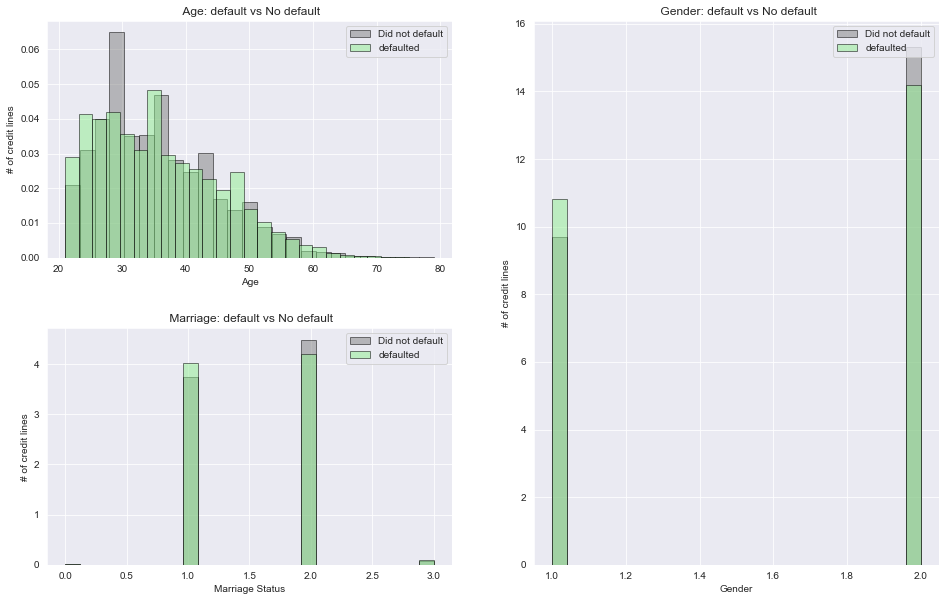

In [106]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(data[data['default'] ==0].AGE, bins = 25, label ='Did not default',density=True,  alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(data[data['default']==1].AGE, bins = 25, label = 'defaulted', density=True, alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title(' Age: default vs No default')
ax1.set_xlabel('Age')
ax1.set_ylabel('# of credit lines')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(data[data['default'] ==0].MARRIAGE, bins = 25, label ='Did not default',density=True,  alpha = .50,edgecolor= 'black',color ='grey')
ax2.hist(data[data['default']==1].MARRIAGE, bins = 25, label = 'defaulted', density=True, alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax2.set_title(' Marriage: default vs No default')
ax2.set_xlabel('Marriage Status')
ax2.set_ylabel('# of credit lines')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(122)
ax3.hist(data[data['default'] ==0].SEX, bins = 25, label ='Did not default',density=True,  alpha = .50,edgecolor= 'black',color ='grey')
ax3.hist(data[data['default']==1].SEX, bins = 25, label = 'defaulted', density=True, alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax3.set_title(' Gender: default vs No default')
ax3.set_xlabel('Gender')
ax3.set_ylabel('# of credit lines')
ax3.legend(loc = 'upper right')



plt.show()

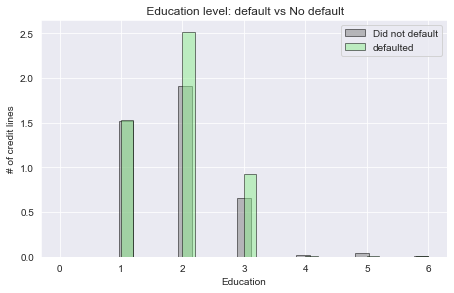

In [89]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax4 = fig.add_subplot(221)
ax4.hist(data[data['default'] ==0].EDUCATION, bins = 25, label ='Did not default',density=True,  alpha = .50,edgecolor= 'black',color ='grey')
ax4.hist(data[data['default']==1].EDUCATION, bins = 25, label = 'defaulted', density=True, alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax4.set_title(' Education level: default vs No default')
ax4.set_xlabel('Education')
ax4.set_ylabel('# of credit lines')
ax4.legend(loc = 'upper right')

plt.show()

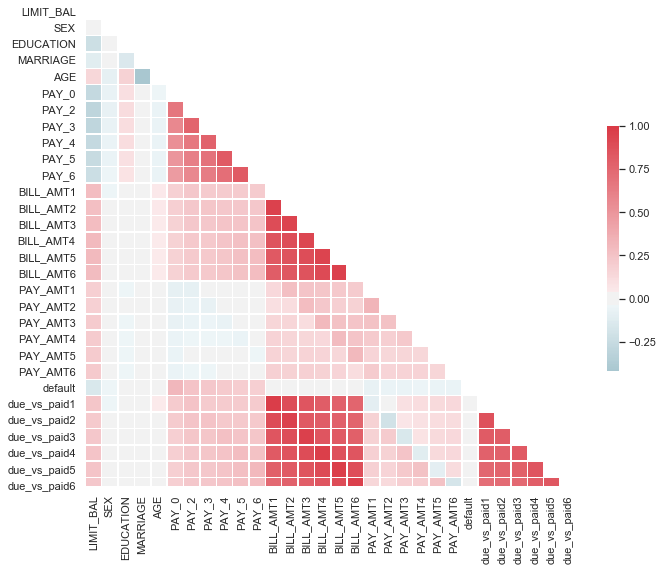

In [111]:
sns.set(style="white")


# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [115]:
corr[abs(corr > 0.60)]
#pay history all pretty correlated with eachother
#just keep one? set up to 0 or 1?
#bill amts highly correlated with eachother - keep one bill amt and one pay amt? 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,due_vs_paid1,due_vs_paid2,due_vs_paid3,due_vs_paid4,due_vs_paid5,due_vs_paid6
LIMIT_BAL,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEX,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_0,NaN,NaN,NaN,NaN,NaN,1.000000,0.672889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_2,NaN,NaN,NaN,NaN,NaN,0.672889,1.000000,0.764935,0.658755,0.619906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_3,NaN,NaN,NaN,NaN,NaN,NaN,0.764935,1.000000,0.777617,0.688033,0.634874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_4,NaN,NaN,NaN,NaN,NaN,NaN,0.658755,0.777617,1.000000,0.821642,0.715512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAY_5,NaN,NaN,NaN,NaN,NaN,NaN,0.619906,0.688033,0.821642,1.000000,0.817673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
corr


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,due_vs_paid1,due_vs_paid2,due_vs_paid3,due_vs_paid4,due_vs_paid5,due_vs_paid6
LIMIT_BAL,1.000000,0.027786,-0.218458,-0.107251,0.144338,-0.268582,-0.296866,-0.285243,-0.265924,-0.246651,-0.232988,0.283646,0.277367,0.282861,0.297081,0.299122,0.292186,0.193930,0.185436,0.207461,0.204746,0.213842,0.218610,-0.150855,0.239223,0.216294,0.225613,0.247748,0.248024,0.226124
SEX,0.027786,1.000000,0.013226,-0.032407,-0.084107,-0.063603,-0.069736,-0.064660,-0.056252,-0.054067,-0.040828,-0.036140,-0.032852,-0.027103,-0.024464,-0.017746,-0.015860,-0.000013,-0.005674,-0.009696,-0.002076,-0.000857,-0.001893,-0.037813,-0.036300,-0.030646,-0.024364,-0.024028,-0.017633,-0.015169
EDUCATION,-0.218458,0.013226,1.000000,-0.142911,0.177127,0.104941,0.125218,0.115547,0.112171,0.100142,0.083863,0.022594,0.017028,0.012008,-0.000815,-0.008207,-0.009212,-0.036174,-0.029996,-0.038001,-0.041374,-0.040031,-0.036006,0.028139,0.031223,0.026051,0.022201,0.009330,0.001625,0.001321
MARRIAGE,-0.107251,-0.032407,-0.142911,1.000000,-0.417248,0.021259,0.028861,0.039703,0.041022,0.039065,0.038691,-0.017268,-0.019169,-0.021682,-0.019141,-0.021466,-0.015083,-0.006907,-0.002680,0.003038,-0.007768,0.003561,-0.009950,-0.023176,-0.015718,-0.018077,-0.022402,-0.017292,-0.022464,-0.012060
AGE,0.144338,-0.084107,0.177127,-0.417248,1.000000,-0.041349,-0.057144,-0.061674,-0.060222,-0.061415,-0.056410,0.048985,0.047971,0.047014,0.045040,0.045188,0.043316,0.025407,0.020186,0.025558,0.020936,0.022432,0.019743,0.014292,0.043219,0.041077,0.039906,0.040039,0.039905,0.037198
PAY_0,-0.268582,-0.063603,0.104941,0.021259,-0.041349,1.000000,0.672889,0.571926,0.534752,0.504522,0.470038,0.184428,0.186587,0.178688,0.172755,0.174226,0.173086,-0.076906,-0.069162,-0.069399,-0.061511,-0.056878,-0.059417,0.318692,0.203390,0.205352,0.196583,0.188355,0.189231,0.188781
PAY_2,-0.296866,-0.069736,0.125218,0.028861,-0.057144,0.672889,1.000000,0.764935,0.658755,0.619906,0.575016,0.235139,0.235188,0.225971,0.219493,0.218316,0.218299,-0.078097,-0.059546,-0.052031,-0.044863,-0.033839,-0.037124,0.256988,0.254612,0.250312,0.238965,0.231149,0.227882,0.227119
PAY_3,-0.285243,-0.064660,0.115547,0.039703,-0.061674,0.571926,0.764935,1.000000,0.777617,0.688033,0.634874,0.208265,0.237450,0.228859,0.224607,0.222040,0.220554,0.004385,-0.070834,-0.048903,-0.043839,-0.033716,-0.036079,0.232215,0.208175,0.256027,0.240996,0.236027,0.231596,0.229051
PAY_4,-0.265924,-0.056252,0.112171,0.041022,-0.060222,0.534752,0.658755,0.777617,1.000000,0.821642,0.715512,0.203331,0.226309,0.247847,0.243663,0.240505,0.236820,-0.008223,0.000764,-0.065864,-0.040889,-0.031430,-0.026479,0.216179,0.206191,0.222942,0.264471,0.254417,0.249601,0.242385
PAY_5,-0.246651,-0.054067,0.100142,0.039065,-0.061415,0.504522,0.619906,0.688033,0.821642,1.000000,0.817673,0.205301,0.226878,0.246190,0.270240,0.267731,0.261525,-0.004751,0.000999,0.009714,-0.055811,-0.029758,-0.023265,0.200774,0.207351,0.223430,0.242440,0.284733,0.276565,0.265936
